In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import auc, roc_curve

In [2]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
gender_one_hot = pd.get_dummies(data['Gender'])
vehicle_age_one_hot = pd.get_dummies(data['Vehicle_Age'], prefix='Vehicle_Age')
vehicle_damage_one_hot = pd.get_dummies(data['Vehicle_Damage'], prefix='Vehicle_Damage')
preprocessed_data = pd.concat([data, gender_one_hot, vehicle_age_one_hot, vehicle_damage_one_hot], axis=1)
preprocessed_data = preprocessed_data.drop(['id', 'Gender', 'Vehicle_Age', 'Vehicle_Damage'], axis=1)

In [4]:
x = preprocessed_data.drop('Response', axis=1)
y = data['Response']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = DecisionTreeClassifier().fit(x_train, y_train)

In [5]:
accuracy = clf.score(x_test,y_test)
accuracy

0.8236467161711841

In [6]:
y_dt = clf.predict_proba(x_test)

AUC of Decision Tree: 0.6035671402879796


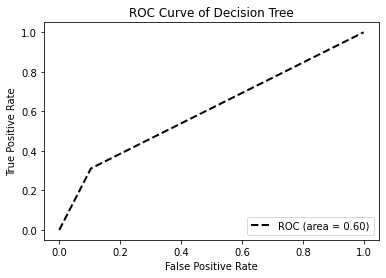

In [7]:
fpr_dt, tpr_dt, thersholds_dt = roc_curve(y_test, y_dt[:,1], pos_label = 1)

# for i, value in enumerate(thersholds_rf):
#     print("%f %f %f" % (fpr_rf[i], tpr_rf[i], value))
    
roc_auc_dt = auc(fpr_dt, tpr_dt)
print("AUC of Decision Tree:", roc_auc_dt)
plt.plot(fpr_dt, tpr_dt, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc_dt), lw=2)
 
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Decision Tree')
plt.legend(loc="lower right")
plt.show()

# print('FPR = ', fpr_rf)
# print('TPR = ', tpr_rf)
# print('Thresholds = ', thersholds_rf)

In [8]:
rf_clf = RandomForestClassifier().fit(x_train, y_train)
accuracy_rf = rf_clf.score(x_test,y_test)
accuracy_rf

0.8654587914250479

In [9]:
y_rf = rf_clf.predict_proba(x_test)
print(y_rf[y_rf == 1])
print(len(y_rf == 1))

[1. 1. 1. ... 1. 1. 1.]
76222


AUC of Random Forest: 0.8350775888116102


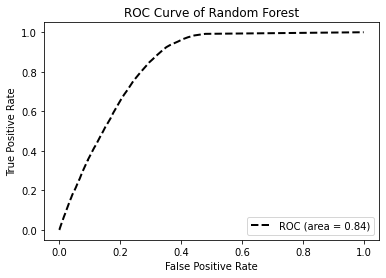

In [10]:
fpr_rf, tpr_rf, thersholds_rf = roc_curve(y_test, y_rf[:,1], pos_label = 1)

# for i, value in enumerate(thersholds_rf):
#     print("%f %f %f" % (fpr_rf[i], tpr_rf[i], value))
    
roc_auc_rf = auc(fpr_rf, tpr_rf)
print("AUC of Random Forest:", roc_auc_rf)
plt.plot(fpr_rf, tpr_rf, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc_rf), lw=2)
 
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.legend(loc="lower right")
plt.show()

# print('FPR = ', fpr_rf)
# print('TPR = ', tpr_rf)
# print('Thresholds = ', thersholds_rf)

In [11]:
boost_clf = GradientBoostingClassifier().fit(x_train, y_train)
accuracy_boost = boost_clf.score(x_test,y_test)
accuracy_boost
y_gb = boost_clf.predict_proba(x_test)
print(y_gb[y_gb == 1])


[]


In [12]:
print(y_gb)

[[0.60169366 0.39830634]
 [0.80347304 0.19652696]
 [0.89510896 0.10489104]
 ...
 [0.95002194 0.04997806]
 [0.77260283 0.22739717]
 [0.70488239 0.29511761]]


AUC of Gradient Boosting: 0.8584200992769797


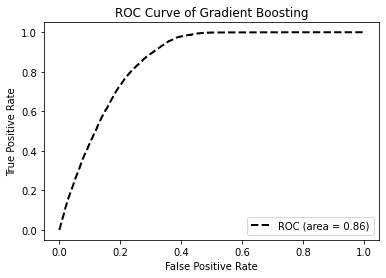

In [13]:
fpr_gb, tpr_gb, thersholds_gb = roc_curve(y_test, y_gb[:,1], pos_label = 1)

# for i, value in enumerate(thersholds_gb):
#     print("%f %f %f" % (fpr_gb[i], tpr_gb[i], value))
    
roc_auc_gb = auc(fpr_gb, tpr_gb)
print("AUC of Gradient Boosting:", roc_auc_gb)
plt.plot(fpr_gb, tpr_gb, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc_gb), lw=2)
 
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

# print('FPR = ', fpr_gb)
# print('TPR = ', tpr_gb)
# print('Thresholds = ', thersholds_gb)

In [14]:
lr_model = LogisticRegression(penalty='l2').fit(x_train, y_train)
y_lr = lr_model.predict_proba(x_test)

C:\Users\94333\Python\env_ds_39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC of Logistic Regression: 0.8249592955246745


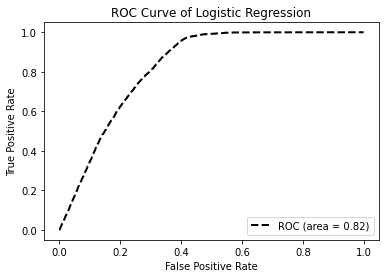

In [15]:
fpr_lr, tpr_lr, thersholds_lr = roc_curve(y_test, y_lr[:,1], pos_label = 1)

# for i, value in enumerate(thersholds_lr):
#     print("%f %f %f" % (fpr_lr[i], tpr_lr[i], value))
    
roc_auc_lr = auc(fpr_lr, tpr_lr)
print("AUC of Logistic Regression:", roc_auc_lr)
plt.plot(fpr_lr, tpr_lr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc_lr), lw=2)
 
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# print('FPR = ', fpr_lr)
# print('TPR = ', tpr_lr)
# print('Thresholds = ', thersholds_lr)